***Submitted by Srikanth Namuduri ***

NYU CUSP PUI

***Assignment 1 Homework 3 ***


    -GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean
    
    - include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice
    - For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well)
    - Describe the behavior you see in the plots in terms of the law of large numbers
    - PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing


In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import matplotlib as plt
import pandas as pd
    
%matplotlib inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
distributions = ['poisson', 'gaus', 'chisq', 'logistic', 'binomial']

mymean = 100
mysd = 50
np.random.seed(1)

sizes = np.random.randint(10,2000,100)

md = {}

for d in distributions:
    md[d] = {}

In [3]:
sizes

array([1071,  245, 1942, 1106, 1801,  915,  725, 1679,  857,  970,  154,
        139, 1617,  759,  518, 1424, 1315, 1212, 1310, 1288,  367,  924,
        478,  917,  262, 1524,  678, 1959,  408,  572,  590, 1249, 1011,
        763, 1537, 1512, 1898, 1120,  151, 1427, 1041,  329,  839, 1568,
       1347,  523, 1930,  326,  219, 1298,  738, 1687,  637,  441,  643,
        466,  552, 1105, 1421, 1488, 1951, 1595, 1347,  525,  974,  802,
        507, 1077, 1622, 1060, 1854, 1370,  631,  893, 1331, 1500,   25,
       1098,  206,   35, 1401, 1772, 1505, 1937, 1316, 1699, 1650, 1056,
       1811, 1741, 1009, 1160, 1313, 1415, 1390,  165,  943,  323,  605,
       1200])

In [4]:
for n in sizes:
    md['chisq'][n] = np.random.chisquare(mymean, size=n)
    md['gaus'][n] = np.random.normal(mymean, mysd, size=n)
    md['binomial'][n] = np.random.binomial(200,0.5, size=n)
    md['poisson'][n] = np.random.poisson(100, size=n)
    md['logistic'][n] = np.random.logistic(100, 50, size=n)

In [5]:
#converting the dictionary into a dataframe
means = pd.DataFrame(md)


# each element in the dataframe is a sample. replacing each sample with its mean to create a df with sample means
for c in means.columns:
    
    for n in sizes:
        means[c][n] = np.mean(means[c][n])
         
print(means.head())

print(means.shape)


    binomial    chisq     gaus logistic  poisson
25     99.68   98.914  109.252  103.867   100.44
35   99.7143  101.081  109.877  104.891  101.314
139  100.374  100.237  94.2557  97.0614  100.108
151  98.6556  100.913   92.324  95.1639  100.013
154  99.8636  98.7016  104.521  99.7092  101.948
(99, 5)


# To plot the sample mean vs size for all distributions

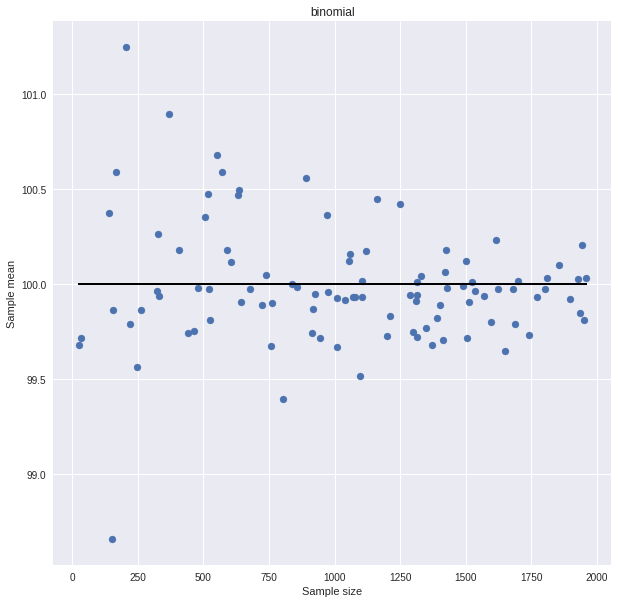

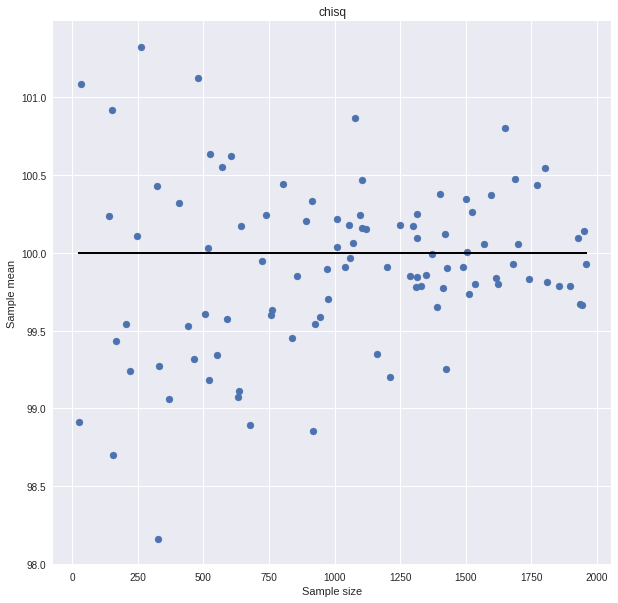

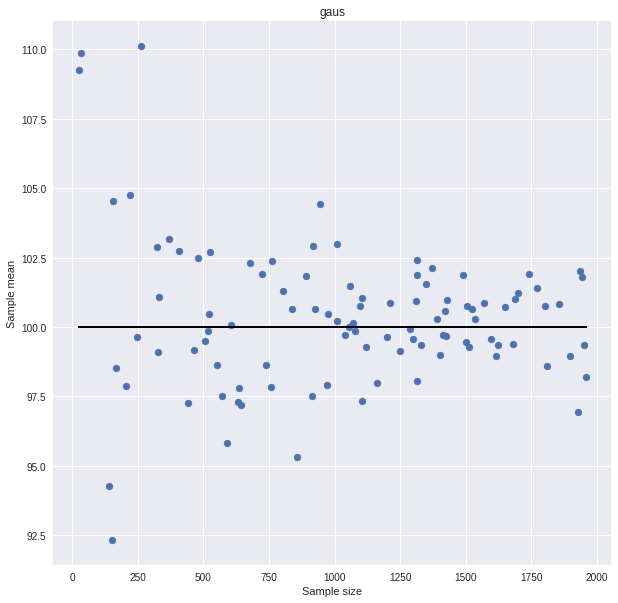

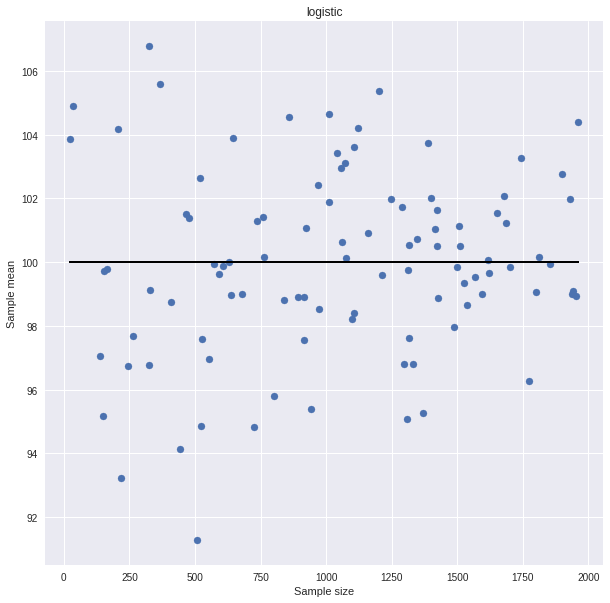

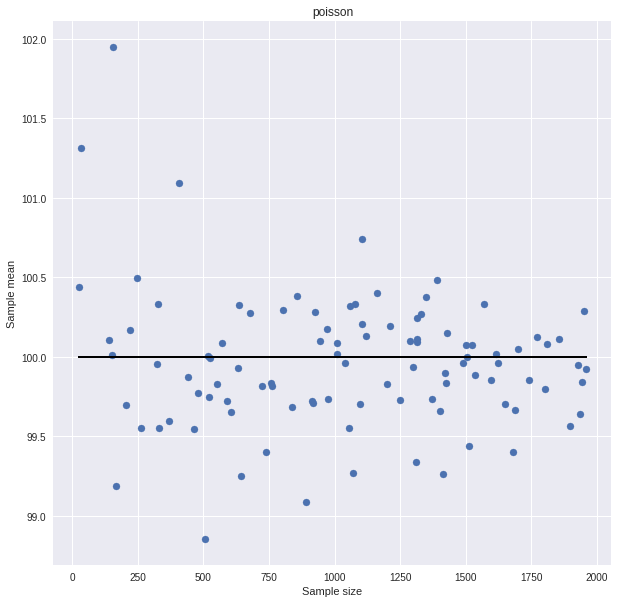

In [6]:
for c in means.columns:
    
    fig, ax = pl.subplots(1,1,figsize=(10,10))
    ax = pl.scatter(means.index, means[c])
    ax = pl.plot(sizes, [100 for i in sizes], color = 'black')
    pl.xlabel('Sample size')
    pl.ylabel('Sample mean')
    pl.title(c)

# Observation: The variation in the mean decreases with the sample size

In [7]:
means['all_means'] = means.apply(lambda x: np.mean(x), axis = 1)

In [8]:
means.head()

,binomial,chisq,gaus,logistic,poisson,all_means
25,99.68,98.914,109.252,103.867,100.44,102.430630
35,99.7143,101.081,109.877,104.891,101.314,103.375537
139,100.374,100.237,94.2557,97.0614,100.108,98.407152
151,98.6556,100.913,92.324,95.1639,100.013,97.413986
154,99.8636,98.7016,104.521,99.7092,101.948,100.948619


# To plot the mean of all distributions

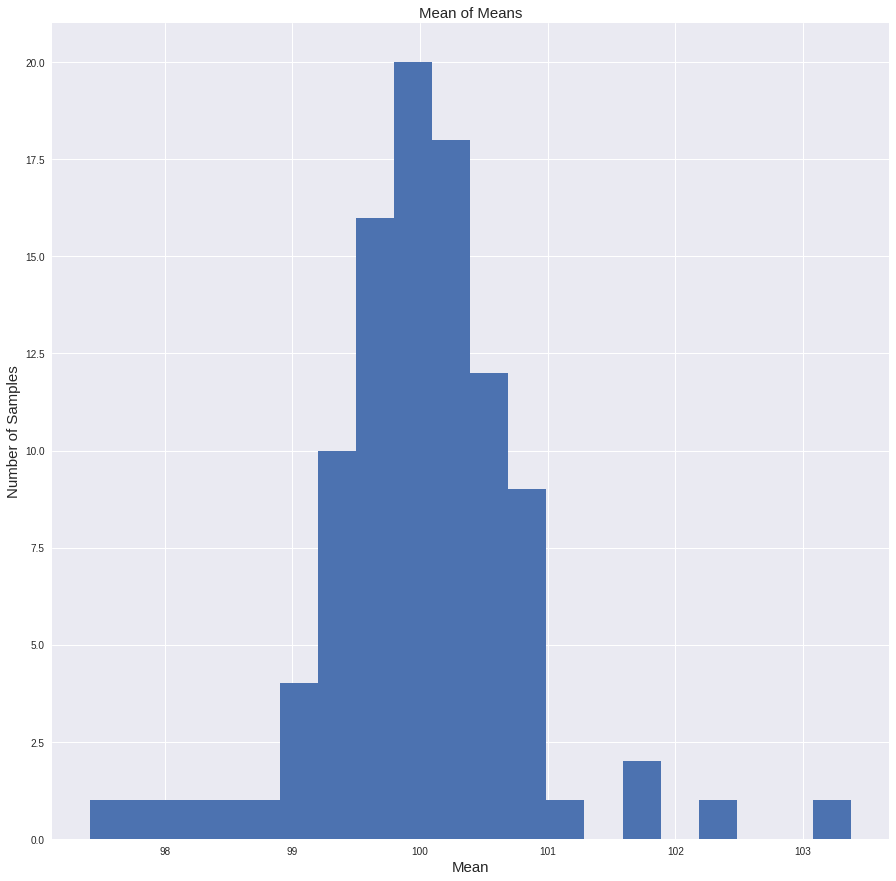

In [9]:
fig, ax = pl.subplots(1,1,figsize=(15,15))

ax = pl.hist(means.all_means, bins = 20)
pl.xlabel('Mean', fontsize = 15)
pl.ylabel('Number of Samples', fontsize = 15)
pl.title('Mean of Means', fontsize = 15)